In [1]:
import dlib,cv2
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.patches as patches
import matplotlib.patheffects as path_effects

In [2]:
detector = dlib.get_frontal_face_detector()
sp = dlib.shape_predictor('shape_predictor_68_face_landmarks.dat')
facerec = dlib.face_recognition_model_v1('dlib_face_recognition_resnet_model_v1.dat')

In [3]:
def find_faces(img):
    dets = detector(img, 1)

    if len(dets) == 0:
        return np.empty(0), np.empty(0), np.empty(0)
    
    rects, shapes = [], []
    shapes_np = np.zeros((len(dets), 68, 2), dtype=np.int)
    for k, d in enumerate(dets):
        rect = ((d.left(), d.top()), (d.right(), d.bottom()))
        rects.append(rect)

        shape = sp(img, d)
        
        
        for i in range(0, 68):
            shapes_np[k][i] = (shape.part(i).x, shape.part(i).y)

        shapes.append(shape)
        
    return rects, shapes, shapes_np

In [4]:
def encode_faces(img, shapes):
    face_descriptors = []
    for shape in shapes:
        face_descriptor = facerec.compute_face_descriptor(img, shape)
        face_descriptors.append(np.array(face_descriptor))

    return np.array(face_descriptors)

In [5]:
img_paths = {
    'myeong soo': 'img/park.jpg',
    'iu': 'img/iu.jpg',
    'suzi': 'img/suzi.jpg',
    'hys': 'img/han.jpg'
}
descs = {
    'myeong soo': None,
    'iu': None,
    'suzi': None,
    'hys': None    
}

for name, img_path in img_paths.items():
    img_bgr = cv2.imread(img_path)
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

    _, img_shapes, _ = find_faces(img_rgb)
    descs[name] = encode_faces(img_rgb, img_shapes)[0]

np.save('img/descs.npy', descs)
print(descs)

{'myeong soo': array([-0.05624328,  0.07410507,  0.03007506, -0.05022122, -0.05327594,
       -0.0487284 , -0.04858552, -0.15300778,  0.15035397, -0.11901346,
        0.19805062, -0.06646013, -0.19935896, -0.05126269, -0.12231264,
        0.19207513, -0.20001695, -0.10212047, -0.03264634, -0.04504416,
        0.11641894,  0.06027881, -0.04165629,  0.01922617, -0.0446808 ,
       -0.2701301 , -0.09417854, -0.05157478,  0.03080811, -0.0288115 ,
       -0.06390627,  0.03890994, -0.15727314, -0.03230498,  0.04150371,
        0.09480511, -0.0095703 , -0.07341905,  0.13155945, -0.00470929,
       -0.16486724,  0.04899067,  0.04522408,  0.19551516,  0.17079127,
        0.04102336,  0.01996724, -0.16258158,  0.11381178, -0.10184382,
       -0.04139465,  0.15081665,  0.08771429,  0.0990639 , -0.02654371,
       -0.13743344,  0.0303773 ,  0.07901525, -0.07936487,  0.02034644,
        0.14368272, -0.11623511, -0.03675366, -0.04962482,  0.17766069,
       -0.00790328, -0.12900254, -0.2153784 ,  0.

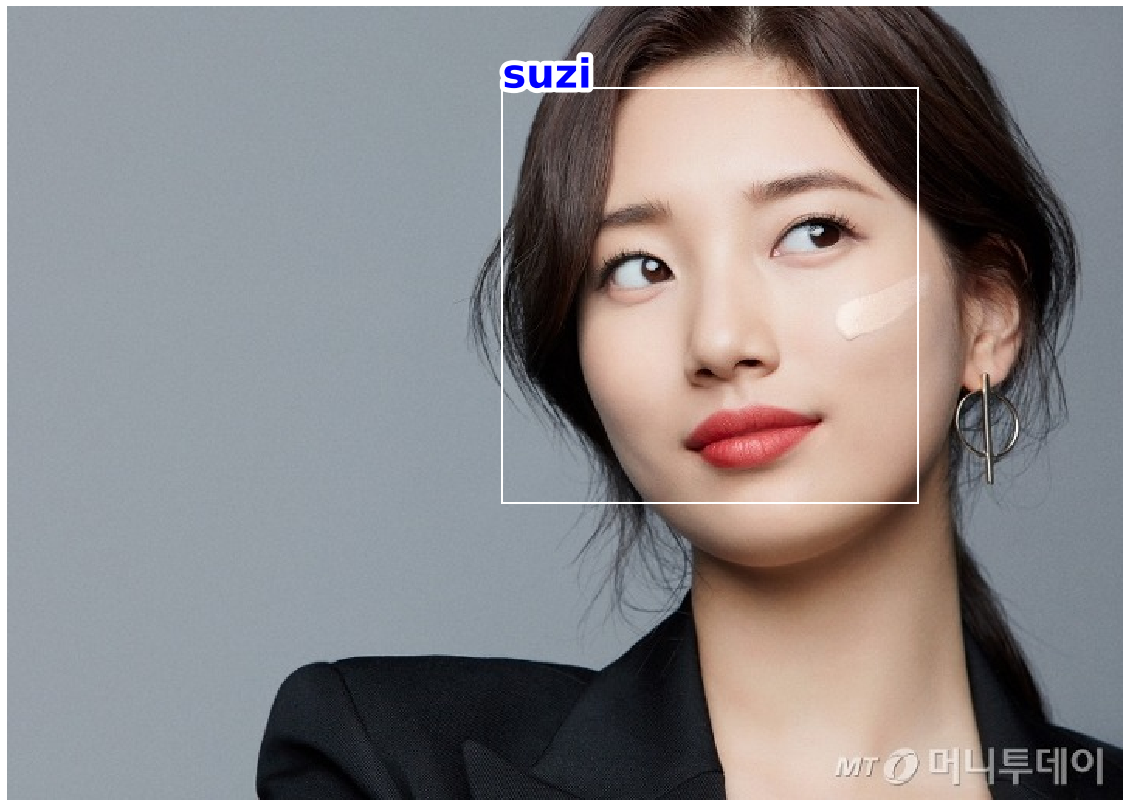

In [6]:
img_bgr = cv2.imread('img/suzi.jpg')
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

rects, shapes, _ = find_faces(img_rgb)
descriptors = encode_faces(img_rgb, shapes)

fig, ax = plt.subplots(1, figsize=(20, 20))
ax.imshow(img_rgb)

for i, desc in enumerate(descriptors):
    
    found = False
    for name, saved_desc in descs.items():
        dist = np.linalg.norm([desc] - saved_desc, axis=1)

        if dist < 0.35:
            found = True

            text = ax.text(rects[i][0][0], rects[i][0][1], name,
                    color='b', fontsize=40, fontweight='bold')
            text.set_path_effects([path_effects.Stroke(linewidth=10, foreground='white'), path_effects.Normal()])
            rect = patches.Rectangle(rects[i][0],
                                 rects[i][1][1] - rects[i][0][1],
                                 rects[i][1][0] - rects[i][0][0],
                                 linewidth=2, edgecolor='w', facecolor='none')
            ax.add_patch(rect)

            break
    
    if not found:
        ax.text(rects[i][0][0], rects[i][0][1], 'unknown',
                color='r', fontsize=20, fontweight='bold')
        rect = patches.Rectangle(rects[i][0],
                             rects[i][1][1] - rects[i][0][1],
                             rects[i][1][0] - rects[i][0][0],
                             linewidth=2, edgecolor='r', facecolor='none')
        ax.add_patch(rect)

plt.axis('off')
plt.savefig('img/output.png')
plt.show()

In [7]:
import dlib, cv2
import numpy as np

detector = dlib.get_frontal_face_detector()
sp = dlib.shape_predictor('shape_predictor_68_face_landmarks.dat')
facerec = dlib.face_recognition_model_v1('dlib_face_recognition_resnet_model_v1.dat')

descs = np.load('img/descs.npy')[()]

def encode_face(img):
  dets = detector(img, 1)

  if len(dets) == 0:
    return np.empty(0)

  for k, d in enumerate(dets):
    shape = sp(img, d)
    face_descriptor = facerec.compute_face_descriptor(img, shape)

    return np.array(face_descriptor)

video_path = 'img/video.mp4'
cap = cv2.VideoCapture(video_path)

if not cap.isOpened():
  exit()

_, img_bgr = cap.read() # (800, 1920, 3)
padding_size = 0
resized_width = 400
video_size = (resized_width, int(img_bgr.shape[0] * resized_width // img_bgr.shape[1]))
output_size = (resized_width, int(img_bgr.shape[0] * resized_width // img_bgr.shape[1] + padding_size * 2))

fourcc = cv2.VideoWriter_fourcc('m', 'p', '4', 'v')
writer = cv2.VideoWriter('%s_output.mp4' % (video_path.split('.')[0]), fourcc, cap.get(cv2.CAP_PROP_FPS), output_size)

while True:
  ret, img_bgr = cap.read()
  if not ret:
    break

  img_bgr = cv2.resize(img_bgr, video_size)
  img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

  # img_bgr = cv2.copyMakeBorder(img_bgr, top=padding_size, bottom=padding_size, left=0, right=0, borderType=cv2.BORDER_CONSTANT, value=(0,0,0))
  
  dets = detector(img_bgr, 1)

  for k, d in enumerate(dets):
    shape = sp(img_rgb, d)
    face_descriptor = facerec.compute_face_descriptor(img_rgb, shape)

    last_found = {'name': 'unknown', 'dist': 0.6, 'color': (0,0,255)}

    for name, saved_desc in descs.items():
      dist = np.linalg.norm([face_descriptor] - saved_desc, axis=1)

      if dist < last_found['dist']:
        last_found = {'name': name, 'dist': dist, 'color': (255,255,255)}

    cv2.rectangle(img_bgr, pt1=(d.left(), d.top()), pt2=(d.right(), d.bottom()), color=last_found['color'], thickness=2)
    cv2.putText(img_bgr, last_found['name'], org=(d.left(), d.top()), fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=1, color=last_found['color'], thickness=2)

  writer.write(img_bgr)

  cv2.imshow('img', img_bgr)
  if cv2.waitKey(1) == ord('q'):
    break

cap.release()
writer.release()